# Proyek Analisis Data: Bike Sharing
- **Nama:** Juniyara Parisya Setiawan
- **Email:** parissajuniara@gmail.com
- **ID Dicoding:** juniyaraparisya

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Data Wrangling

## Gathering Data

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.


In [2]:
# import data day.csv

day_df = pd.read_csv('https://raw.githubusercontent.com/JunTheCoder62/Data-Analytics/refs/heads/main/Data/day.csv')
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# import data hour.csv

hour_df = pd.read_csv('https://raw.githubusercontent.com/JunTheCoder62/Data-Analytics/refs/heads/main/Data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data Wrangling

### a. Type Data

In [4]:
## Type Data

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### b. Duplicate

In [6]:
day_df.duplicated().sum()

np.int64(0)

In [7]:
hour_df.duplicated().sum()

np.int64(0)

c. Missing Value

In [8]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


## Cleaning data

Dalam Cleaning data dilakukan penyesuaian tipe data, nama data, dan penyesuaian data yang akan digunakan.

In [10]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
# untuk mengetahi jumlah data unik dalam column

day_df['mnth'].value_counts().sort_index()

,count
mnth,
1,62
2,57
3,62
4,60
5,62
6,60
7,62
8,62
9,60


In [13]:
# Bisa juga dengan menggunakan func .unique()

day_df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [14]:
day_df.rename(columns={'yr': 'year', 'mnth': 'month', 'weathersit': 'weather_condition', 'hum': 'humidity', 'cnt': 'count'}, inplace=True)

Mapping nilai data

In [15]:
# Mapping Bulan
mapping_month = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
day_df['month'] = day_df['month'].map(mapping_month)

In [16]:
# Mapping Season
mapping_season = {
    1: 'Spring'
    , 2: 'Summer'
    , 3: 'Fall'
    , 4: 'Winter'
}
day_df['season'] = day_df['season'].map(mapping_season)


In [17]:
# Mapping Weather
mapping_weather = {
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy'
    , 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
    , 3: 'Light Snow'
    , 4: 'Heavy Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
}
day_df['weather_condition'] = day_df['weather_condition'].map(mapping_weather)

In [18]:
# mapping Tahun
mapping_year = {0: 2011, 1: 2012}
day_df['year'] = day_df['year'].map(mapping_year)

### a. cleaning data data day_df.csv

In [19]:
day_df.describe()

,instant,year,holiday,weekday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,2011.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011.000000,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012.000000,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012.000000,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [20]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            731 non-null    int64  
 1   dteday             731 non-null    object 
 2   season             731 non-null    object 
 3   year               731 non-null    int64  
 4   month              731 non-null    object 
 5   holiday            731 non-null    int64  
 6   weekday            731 non-null    int64  
 7   workingday         731 non-null    int64  
 8   weather_condition  731 non-null    object 
 9   temp               731 non-null    float64
 10  atemp              731 non-null    float64
 11  humidity           731 non-null    float64
 12  windspeed          731 non-null    float64
 13  casual             731 non-null    int64  
 14  registered         731 non-null    int64  
 15  count              731 non-null    int64  
dtypes: float64(4), int64(8), o

In [21]:
day_df.drop(['windspeed', 'weekday'],  axis=1, inplace=True)

In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            731 non-null    int64  
 1   dteday             731 non-null    object 
 2   season             731 non-null    object 
 3   year               731 non-null    int64  
 4   month              731 non-null    object 
 5   holiday            731 non-null    int64  
 6   workingday         731 non-null    int64  
 7   weather_condition  731 non-null    object 
 8   temp               731 non-null    float64
 9   atemp              731 non-null    float64
 10  humidity           731 non-null    float64
 11  casual             731 non-null    int64  
 12  registered         731 non-null    int64  
 13  count              731 non-null    int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 80.1+ KB


In [23]:
# mengubah tipe data dari int menajdi categorical

day_df['year'] = day_df['year'].astype('object')
day_df['month'] = day_df['month'].astype('category')
day_df['season'] = day_df['season'].astype('category')
day_df['weather_condition'] = day_df['weather_condition'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   instant            731 non-null    int64   
 1   dteday             731 non-null    object  
 2   season             731 non-null    category
 3   year               731 non-null    object  
 4   month              731 non-null    category
 5   holiday            731 non-null    int64   
 6   workingday         731 non-null    category
 7   weather_condition  731 non-null    category
 8   temp               731 non-null    float64 
 9   atemp              731 non-null    float64 
 10  humidity           731 non-null    float64 
 11  casual             731 non-null    int64   
 12  registered         731 non-null    int64   
 13  count              731 non-null    int64   
dtypes: category(4), float64(3), int64(5), object(2)
memory usage: 60.9+ KB


penggantian data dari integre menjadi category adalah agar tidak membebani memory, dan agar data lebih cepat diproses.

### b. cleaning data hour_df.csv

In [24]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [25]:
hour_df.describe(include='object')

,dteday
count,17379
unique,731
top,2012-12-31
freq,24


In [26]:
hour_df.drop(['windspeed', 'weekday'], axis=1, inplace=True)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,0,1,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,1,0,1,1,0,0,1,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,1,0,1,2,0,0,1,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,1,0,1,3,0,0,1,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,1,0,1,4,0,0,1,0.24,0.2879,0.75,0,1,1


In [27]:
hour_df.rename(columns={'yr': 'year', 'mnth': 'month', 'weathersit': 'weather_condition', 'hum': 'humidity', 'cnt': 'count'}, inplace=True)

hour_df.head()

,instant,dteday,season,year,month,hr,holiday,workingday,weather_condition,temp,atemp,humidity,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,0,1,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,1,0,1,1,0,0,1,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,1,0,1,2,0,0,1,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,1,0,1,3,0,0,1,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,1,0,1,4,0,0,1,0.24,0.2879,0.75,0,1,1


Mapping Nilai dari Numerical menjadi Categorical

In [28]:
# Mapping Nilai dari Numerical menjadi Categorical

hour_df['season'] = hour_df['season'].map(mapping_season)
hour_df['year'] = hour_df['year'].map(mapping_year)
hour_df['weather_condition'] = hour_df['weather_condition'].map(mapping_weather)
hour_df['month'] = hour_df['month'].map(mapping_month)

hour_df.head()

,instant,dteday,season,year,month,hr,holiday,workingday,weather_condition,temp,atemp,humidity,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0,1,1


In [29]:
day_df['month'].value_counts()

,count
month,
August,62
December,62
July,62
January,62
October,62
May,62
March,62
April,60
November,60


In [30]:
hour_df.describe().count()

,0
instant,8
year,8
hr,8
holiday,8
workingday,8
temp,8
atemp,8
humidity,8
casual,8
registered,8


In [31]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season             17379 non-null  object 
 3   year               17379 non-null  int64  
 4   month              17379 non-null  object 
 5   hr                 17379 non-null  int64  
 6   holiday            17379 non-null  int64  
 7   workingday         17379 non-null  int64  
 8   weather_condition  17379 non-null  object 
 9   temp               17379 non-null  float64
 10  atemp              17379 non-null  float64
 11  humidity           17379 non-null  float64
 12  casual             17379 non-null  int64  
 13  registered         17379 non-null  int64  
 14  count              17379 non-null  int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 2.0+ MB


# 2. Exploratory Data Analysis (EDA)

## a. day_df EDA

In [32]:
# Jumlah Rental Sepeda untuk setiap bulan

day_df.groupby('month')['count'].sum().sort_values(ascending=False)

/tmp/ipython-input-3905486285.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('month')['count'].sum().sort_values(ascending=False)


,count
month,
August,351194
June,346342
September,345991
July,344948
May,331686
October,322352
April,269094
November,254831
March,228920


In [33]:
day_df.groupby(by=['year', 'month']).agg({
    'count': ['sum', 'max', 'min', 'mean']
})

/tmp/ipython-input-14563936.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=['year', 'month']).agg({


count                         
                   sum   max   min         mean
year month                                     
2011 April       94870  5312   795  3162.333333
     August     136691  5895  1115  4409.387097
     December    87323  3940   705  2816.870968
     February    48215  2927  1005  1721.964286
     January     38189  1985   431  1231.903226
     July       141341  6043  3285  4559.387097
     June       143512  5515  3767  4783.733333
     March       64045  3239   605  2065.967742
     May        135821  5805  2633  4381.322581
     November   102167  4486  1495  3405.566667
     October    123511  5511   627  3984.225806
     September  127418  5423  1842  4247.266667
2012 April      174224  7460  1027  5807.466667
     August     214503  7865  4549  6919.451613
     December   123713  6606   441  3990.741935
     February   103137  5062  1529  3556.448276
     January     96744  4521  1301  3120.774194
     July       203607  8173  4459  6567.967742
     June       202830  8120  4127  6761.000000
     March      164875  8362  3194  5318.548387
     May        195865  8294  2843  6318.225806
     November   152664  6852  2277  5088.800000
     October    198841  8156    22  6414.225806
     September  218573  8714  4073  7285.766667

Dapat ditarik kesimpulan dari insight data diatas yaitu:

* Bulan dengan Rental Tertinggi dan Terendah Overall:
  1. Agustus memiliki jumlah rental sepeda tertinggi secara keseluruhan, diikuti oleh Juni dan September. Ini menunjukkan puncak penggunaan sepeda terjadi di musim panas dan awal musim gugur.
  2. Januari dan Februari memiliki jumlah rental sepeda terendah, yang kemungkinan besar disebabkan oleh kondisi cuaca yang dingin di musim dingin.

* Tren Rental Per Tahun:
  1. Terdapat peningkatan signifikan dalam jumlah rental sepeda dari tahun 2011 ke 2012 untuk hampir setiap bulan. Ini bisa mengindikasikan pertumbuhan popularitas sistem bike-sharing atau ekspansi layanan.
  2. Contohnya, pada bulan April, total rental meningkat dari 94.870 di tahun 2011 menjadi 174.224 di tahun 2012. Hal serupa terlihat di bulan-bulan lainnya seperti Agustus, Juli, dan September.

In [34]:
# Jumlah Rental Sepeda untuk setiap Season

day_df.groupby('season')['count'].sum().sort_values(ascending=False)

/tmp/ipython-input-1513722655.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('season')['count'].sum().sort_values(ascending=False)


,count
season,
Fall,1061129
Summer,918589
Winter,841613
Spring,471348


In [35]:
day_df.groupby(by='season').agg({
    'count': ['sum', 'max', 'min', 'mean'],
    'temp' : ['mean', 'max', 'min', 'std'],
    'atemp': ['mean', 'max', 'min', 'std'],
    'humidity' : ['mean', 'max', 'min', 'std'],
})

/tmp/ipython-input-394956200.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


count                               temp                      \
            sum   max   min         mean      mean       max       min   
season                                                                   
Fall    1061129  8714  1115  5644.303191  0.706309  0.861667  0.469167   
Spring   471348  7836   431  2604.132597  0.297748  0.572500  0.059130   
Summer   918589  8362   795  4992.331522  0.544405  0.808333  0.253043   
Winter   841613  8555    22  4728.162921  0.422906  0.657500  0.220833   

                     atemp                                humidity            \
             std      mean       max       min       std      mean       max   
season                                                                         
Fall    0.070848  0.655898  0.840896  0.242400  0.072056  0.633482  0.939565   
Spring  0.102735  0.296914  0.548617  0.079070  0.099026  0.582903  0.948261   
Summer  0.122650  0.520307  0.757579  0.250339  0.108022  0.626948  0.922500   
Winter  0.107834  0.415539  0.607975  0.227913  0.095536  0.668719  0.972500   

                            
             min       std  
season                      
Fall    0.360000  0.119349  
Spring  0.000000  0.151880  
Summer  0.254167  0.152841  
Winter  0.333478  0.131248

Didapat insight dari tabel diatas yaitu:

* Musim Rental sepeda tertinggi:
Musim gugur memliki jumlah tertinggi peminjaman sepeda (1061129) dengan rata - rata tertinggi. jumlah tertitnggi kedua yaitu musim panas (918589) dengan rata - rata peminjaman tertinggi kedua, kemudian musim dingin dengan jumlah peminjam tertinggi ketiga, dan yang terakhir musim semi.

* Kelembapan Rental Sepeda Tertinggi:
Musin Dingin memiliki jumlah tertinggi rental sepeda dengan humidity yang tinggi, musim gugur memiliki jumlah tertinggi rental sepeda kedua, musim panas memiliki jumlah tertinggi ketiga rental sepeda, dan yang terakhir adalah musim semi rental sepedah tertinggi


## b. hour_df EDA

In [36]:
hour_df.describe()

,instant,year,hr,holiday,workingday,temp,atemp,humidity,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2011.502561,11.546752,0.028770,0.682721,0.496987,0.475775,0.627229,35.676218,153.786869,189.463088
std,5017.0295,0.500008,6.914405,0.167165,0.465431,0.192556,0.171850,0.192930,49.305030,151.357286,181.387599
min,1.0000,2011.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011.000000,6.000000,0.000000,0.000000,0.340000,0.333300,0.480000,4.000000,34.000000,40.000000
50%,8690.0000,2012.000000,12.000000,0.000000,1.000000,0.500000,0.484800,0.630000,17.000000,115.000000,142.000000
75%,13034.5000,2012.000000,18.000000,0.000000,1.000000,0.660000,0.621200,0.780000,48.000000,220.000000,281.000000
max,17379.0000,2012.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,367.000000,886.000000,977.000000


In [37]:
# Rental Sepeda tiap jam dalam 2 tahun untuk hari kerja

hour_df_workingday = hour_df[hour_df['workingday'] == 1]

hour_df_workingday.groupby(by = ['hr', 'workingday']).agg({
    'count' : ['sum', 'mean', 'min', 'max']
    }).sort_values(by=('count', 'sum'), ascending=False)

count                     
                  sum        mean min  max
hr workingday                             
17 1           262120  525.290581  26  976
18 1           245129  492.226908  26  977
8  1           236595  477.006048  31  839
19 1           173504  348.401606  18  743
16 1           146268  293.122244  13  634
7  1           144144  290.612903  18  596
20 1           124360  249.718876  23  567
9  1           119793  241.518145  23  426
15 1           100263  201.331325  13  601
12 1            99808  200.820926   3  471
13 1            98818  198.429719  11  428
21 1            92771  186.287149   6  398
14 1            91419  183.572289  12  651
11 1            78482  158.229839  10  361
22 1            68918  138.389558  11  321
10 1            67142  135.366935   8  275
6  1            50840  102.500000   7  213
23 1            44177   88.708835   9  256
0  1            18246   36.786290   2  283
5  1            12332   24.913131   1   66
1  1             8177   16.552632   1  114
2  1             4229    8.683778   1   74
4  1             2552    5.429787   1   17
3  1             2323    4.942553   1   36

Dapat dilihat dari tabel diatas bahwa rental sepeda terbanyak dalam 2 tahun terbanyak pada pukul 17.00 - 18.00 sore.

untuk Rental terendah pada pukul 3.00 - 4.00 pagi hari.

In [38]:
# Rental Sepeda tiap hari libur

hour_df_Holiday = hour_df[hour_df['holiday'] == 0]

hour_df_Holiday.groupby(by = ['hr', 'holiday']).agg({
    'count' : ('sum', 'mean', 'min', 'max')
    }).sort_values(by=('count', 'sum'), ascending=False)

count                     
               sum        mean min  max
hr holiday                             
17 0        330704  466.437236  15  976
18 0        304128  430.166902  23  977
8  0        257420  364.617564   5  839
19 0        222132  314.189533  11  743
16 0        222030  313.159379  11  783
13 0        178650  252.330508  11  760
12 0        178384  252.311174   3  776
15 0        177581  250.820621   7  750
14 0        169640  239.604520  12  750
20 0        160813  227.458274  11  567
9  0        155843  220.740793  14  426
7  0        152446  215.929178   1  596
11 0        146101  206.941926  10  663
21 0        122398  173.123055   6  398
10 0        121984  172.781870   8  539
22 0         93326  132.002829   9  338
23 0         62725   88.719943   6  256
6  0         54538   77.468750   1  213
0  0         37923   53.791489   2  283
1  0         23347   33.210526   1  168
2  0         15817   22.791066   1  132
5  0         14038   20.169540   1   66
3  0          7965   11.730486   1   79
4  0          4311    6.367799   1   28

Puncak Rental sepeda terbanyak pada pukul 17:00 (5 sore) dan 18:00 (6 sore). Puncak kedua terjadi pada pukul 08:00 (8 pagi). Ini menunjukkan bahwa sebagian besar penggunaan sepeda terjadi selama jam pulang kerja/aktivitas sore dan berangkat kerja/aktivitas pagi.

# Visualization & Data Explanatory Analysis

## Pertanyaan 1: Berapa banyak jumlah pengguna yang menggunakan Rental Sepeda dalam 2 tahun ?

In [39]:
# # Mengubah type data menjadi 'str'
# plot_month_day_df = day_df['month'].astype('str')
# plot_years_day_df = day_df['year'].astype('str')

# # Merge column month dan year
# day_df['month_year'] = plot_month_day_df + ' ' + plot_years_day_df

# # Mengelompokan year dan month
# day_df_group = day_df.groupby(by='month_year')['count'].transform('sum')

# # Membuat line chart
# plt.figure(figsize=(20, 6))
# sns.set(style='whitegrid')
# sns.lineplot(
#     data=day_df,
#     x='month_year',
#     y='total_sum',
#     marker='o'
# )
# plt.title("Total Sepeda yang Disewakan pada 2 Tahun Terakhir")
# plt.xlabel(None)
# plt.ylabel(None)
# plt.xticks(rotation=45)
# plt.show()

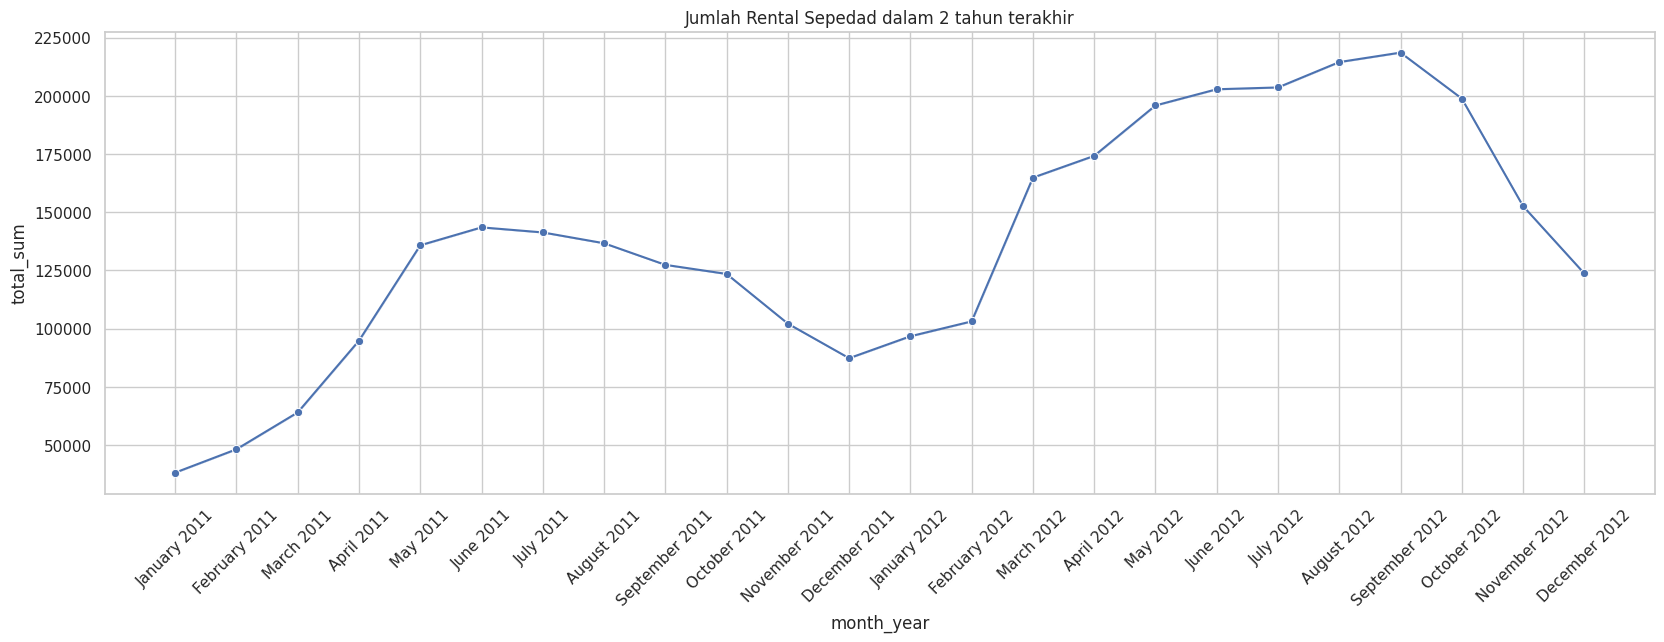

In [40]:
# Mengubah type data menjadi 'str'
plot_month_day_df = day_df['month'].astype('str')
plot_years_day_df = day_df['year'].astype('str')

# Merge column month dan year
day_df['month_year'] = plot_month_day_df + ' ' + plot_years_day_df

# Mengelompokan year dan month dan menyimpannya sebagai kolom baru di day_df
day_df['total_sum'] = day_df.groupby(by='month_year')['count'].transform('sum')

# Membuat line chart
plt.figure(figsize=(20, 6))
sns.set(style='whitegrid')
sns.lineplot(
    data=day_df,
    x='month_year',
    y='total_sum',
    marker='o'
)
plt.title("Jumlah Rental Sepedad dalam 2 tahun terakhir")
plt.xticks(rotation=45)
plt.show()

In [41]:
day_df.groupby(by='month_year')['count'].sum().sort_values(ascending=False)

,count
month_year,
September 2012,218573
August 2012,214503
July 2012,203607
June 2012,202830
October 2012,198841
May 2012,195865
April 2012,174224
March 2012,164875
November 2012,152664


In [42]:
day_df.groupby(by='year')['count'].sum()

,count
year,
2011,1243103
2012,2049576


Dapat dilihat dalam Tabel Chart diatas penyewaan sepeda terbanyak adalah pada bulan September 2012, peningkatan ini dimulai pada February 2012 sampai all time High pada September 2012. Total peminjaman 2012 sebanyak 2049575, tetapi pada bulan Oktober 2012 terjadi penurunan sampai Desember 2012. dapat dilhiat bahwa penurunan ini konsisten, dimana penurunan akan terjadi pada bulan Oktober dan akan meningkat pada Februari.

## Pertanyaan 2: Berapa Lama Rental sepeda selama Hari kerja dan Hari Libur ?

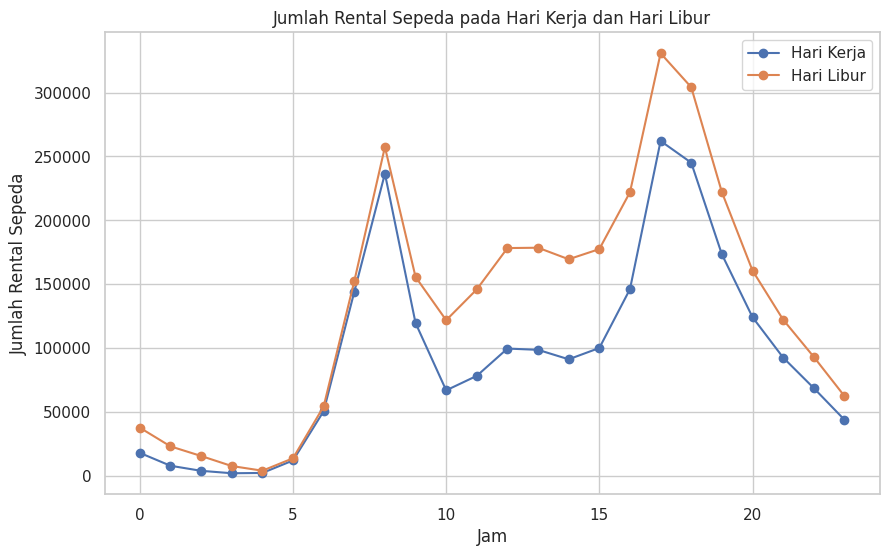

In [43]:
plot_hr_workingday_df = hour_df_workingday.groupby(by = 'hr').agg({'count' : 'sum'}).reset_index()
plot_hr_holiday_df = hour_df_Holiday.groupby(by = 'hr').agg({'count' : 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(style='whitegrid')
plt.plot(plot_hr_workingday_df['hr'], plot_hr_workingday_df['count'], marker='o', label='Hari Kerja')
plt.plot(plot_hr_holiday_df['hr'], plot_hr_holiday_df['count'], marker='o', label='Hari Libur')
plt.title('Jumlah Rental Sepeda pada Hari Kerja dan Hari Libur')
plt.xlabel('Jam')
plt.ylabel('Jumlah Rental Sepeda')
plt.legend()
plt.show()

Dapat dilihat pada Tabel plot Jumlah Rental Sepeda pada Hari Libur dan Hari kerja dengan penggunaan Rental sepeda yang konsisten, terdapat 2 waktu dengan jumlah pengguna Rental sepeda terbanyak, yaitu yang pertama adalah pada pagi hari sekitar pukul 07.00 - 08.00 dan waktu dengan jumlah pengguna terbanyak kedua adalah pada pukul 17.00 - 18.00, Dengan pengguna terbanyak adalah pada hari libur.

# Teknik Analisis Lanjutan

In [46]:
# Convert 'dteday' ke datetime untuk kalkuasi
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

rfm_df = day_df.groupby(by='dteday').agg(
    dteday_max=('dteday', 'max'),
    total_count=('count', 'sum')
).reset_index()

# Rename columns dteday
rfm_df.rename(columns={'dteday_max': 'total_dteday'}, inplace=True)

# Kalkulasi Recency, Frequency, and Monetary
# Untuk Recency, digunakan Maximum date dalam seluruh dataset, tidak hanya per-hari dalam rfm_df
latest_date = day_df['dteday'].max()
rfm_df["recency"] = (latest_date - rfm_df["total_dteday"]).dt.days
rfm_df["frequency"] = rfm_df["total_count"]
rfm_df["monetary"] = rfm_df["total_count"]

rfm_df.head()

,dteday,total_dteday,total_count,recency,frequency,monetary
0,2011-01-01,2011-01-01,985,730,985,985
1,2011-01-02,2011-01-02,801,729,801,801
2,2011-01-03,2011-01-03,1349,728,1349,1349
3,2011-01-04,2011-01-04,1562,727,1562,1562
4,2011-01-05,2011-01-05,1600,726,1600,1600


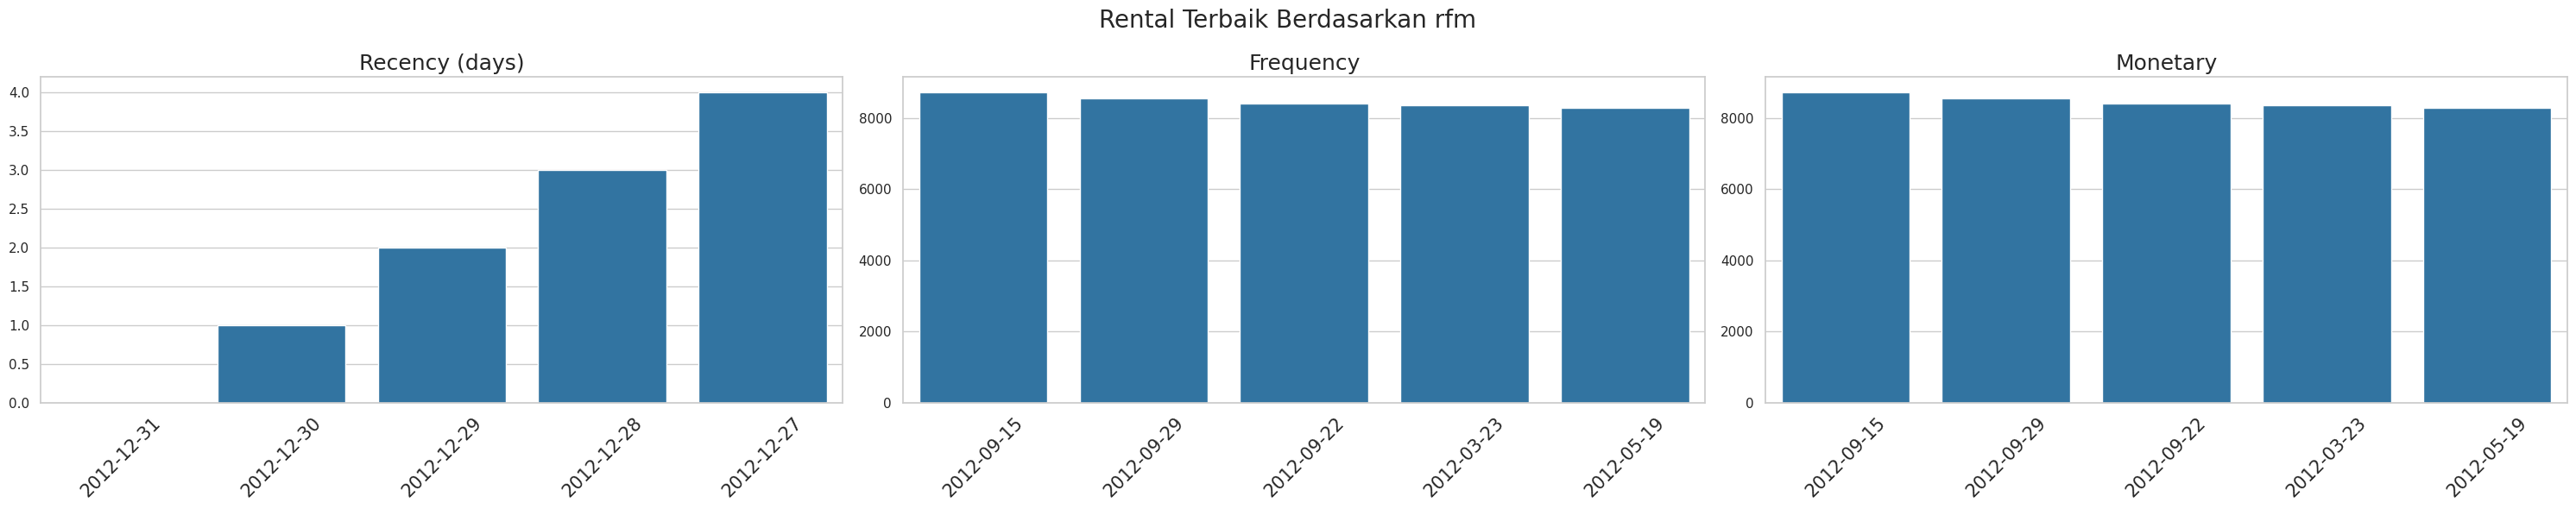

In [47]:
top_recency = rfm_df.sort_values(by="recency", ascending=True).head(5)
top_frequency = rfm_df.sort_values(by="frequency", ascending=False).head(5)
top_monetary = rfm_df.sort_values(by="monetary", ascending=False).head(5)

# Membuat bar plot RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# plot top recency
sns.barplot(
    data=top_recency,
    x="total_dteday",
    y="recency",
    color='tab:blue',
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=45)

# plot top frequency
sns.barplot(
    data=top_frequency,
    x="total_dteday",
    y="frequency",
    color='tab:blue',
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=45)

# plot top monetary
sns.barplot(
    data=top_monetary,
    x="total_dteday",
    y="monetary",
    color='tab:blue',
    ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=45)

plt.suptitle("Rental Terbaik Berdasarkan rfm", fontsize=20) # Changed title to reflect daily data
plt.tight_layout()
plt.show()

Analisis RFM digunakan untuk mengetahui 5 besar segmentasi pelanggan yang kuat yang digunakan untuk mengidentifikasi pelanggan terbaik berdasarkan perilaku pembelian atau penggunaan produk.